In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
HUES = ["Devices", "Ad Types"]

In [3]:
market_df = pd.read_csv("final_shop_6modata.csv")
market_df.head()

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951
2,Shop - 1:1 - Desk - [shop discount code],July,3635,1458,0.40,248,0.09,1606,1.10,1723,39165.46,117.136
3,Shop - 1:1 - Desk - [shop promo code],July,26185,10418,0.40,2294,0.12,13278,1.27,13042,284823.48,-235.921
4,Shop - 1:1 - Desk - [shop promo],July,808,282,0.35,61,0.15,391,1.39,337,7717.77,-53.604


In [38]:
def find_outliers(data: pd.DataFrame, feature: str)-> pd.DataFrame:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1

    low_iqr = data[feature] < q1 - 1.5*iqr
    high_iqr = data[feature] > q3 + 1.5*iqr

    outliers = data[low_iqr | high_iqr]

    print("Outliers Couns: ", len(outliers))
    top_outliers = outliers.sort_values(feature, ascending=False)[:5]

    return outliers, top_outliers

In [27]:
def box_and_line_plots(data: pd.DataFrame, feature: str):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 7))

    for i, _ in enumerate(axes):
        if i == 0:
            sns.boxplot(x=data[feature], ax=axes[0, 0])
            sns.lineplot(x="Month",y=market_df[feature], data=data, 
                         ax=axes[0, 1])
        else:
            sns.boxplot(x=data[feature], y=data[HUES[i-1]], ax=axes[i, 0])
            sns.lineplot(x="Month",y=market_df[feature], data=data, 
                         hue=HUES[i-1], ax=axes[i, 1])
    plt.show()

In [ ]:
def multivariate_plot(data: pd.DataFrame, feature: str):
    pass

In [6]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ad Group     190 non-null    object 
 1   Month        190 non-null    object 
 2   Impressions  190 non-null    int64  
 3   Clicks       190 non-null    int64  
 4   CTR          190 non-null    float64
 5   Conversions  190 non-null    int64  
 6   Conv Rate    190 non-null    float64
 7   Cost         190 non-null    int64  
 8   CPC          190 non-null    float64
 9   Revenue      190 non-null    int64  
 10  Sale Amount  190 non-null    float64
 11  P&L          190 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 17.9+ KB


In [7]:
market_df.isnull().any().sum()

0

In [8]:
market_df.duplicated(keep=False).sum()

0

In [9]:
market_df.head(2)

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951


In [10]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ad Group     190 non-null    object 
 1   Month        190 non-null    object 
 2   Impressions  190 non-null    int64  
 3   Clicks       190 non-null    int64  
 4   CTR          190 non-null    float64
 5   Conversions  190 non-null    int64  
 6   Conv Rate    190 non-null    float64
 7   Cost         190 non-null    int64  
 8   CPC          190 non-null    float64
 9   Revenue      190 non-null    int64  
 10  Sale Amount  190 non-null    float64
 11  P&L          190 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 17.9+ KB


##### **Manipulating Ad Group**
<p>The ad group contain multiple words that could be separated into sevaral columns to deepend our analysis</p>

In [11]:
market_df[["Shop", "Ad Types", "Devices", "Campaigns"]] = market_df["Ad Group"].str.split(" - ", n=3, expand=True)
market_df.head(2)

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Shop,Ad Types,Devices,Campaigns
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086,Shop,1:1,Desk,[shop coupon code]
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951,Shop,1:1,Desk,[shop coupon]


In [14]:
market_df.drop(["Ad Group", "Shop"], axis=1, inplace=True)
market_df.head(2)

,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Ad Types,Devices,Campaigns
0,July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086,1:1,Desk,[shop coupon code]
1,July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951,1:1,Desk,[shop coupon]


In [15]:
# # Cleaned Campaigned
# cleaned_name = {}
# for campaign in market_df["Campaigns"].unique():
#     if "[" in campaign:
#         cleaned_name[campaign] = campaign.strip("[]")
#     else:
#         cleaned_name[campaign] = campaign

# market_df["Campaigns"].replace(cleaned_name, inplace=True)

In [16]:
# Change device data for better clarity
initial_name = market_df["Devices"].unique()
new_name = ["Desktop", "Mobile"]
change_name = dict(zip(initial_name, new_name))

market_df["Devices"].replace(change_name, inplace=True)

##### **Checking Impression Data**

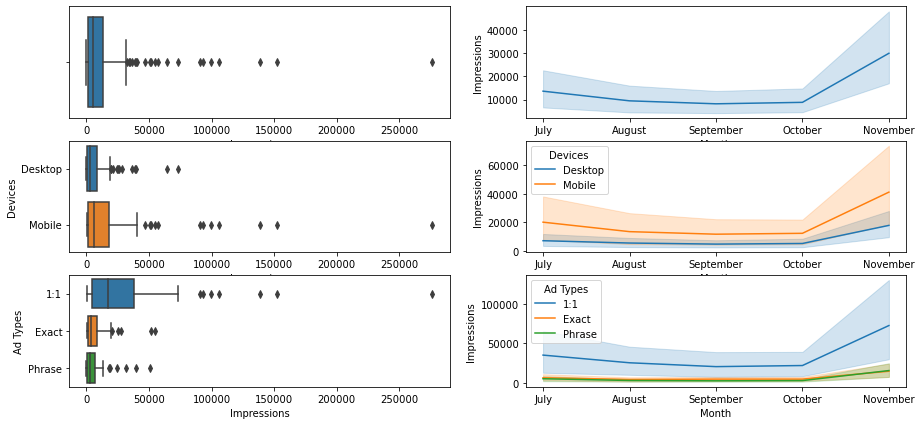

In [28]:
box_and_line_plots(data=market_df, feature="Impressions")

In [39]:
outliers, top_outliers = find_outliers(market_df, "Impressions")
top_outliers[:5]

Outliers Couns:  21


,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Ad Types,Devices,Campaigns
151,November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.10,-5605.297,1:1,Mobile,[shop coupon]
6,July,152394,59177,0.39,2666,0.04,19371,0.33,13699,294536.92,-5672.271,1:1,Mobile,[shop coupon]
159,November,138811,57405,0.41,7563,0.10,43542,0.76,42440,886095.31,-1101.899,1:1,Mobile,[shop promo code]
40,August,105966,32005,0.30,1530,0.04,10713,0.33,8473,185757.89,-2240.076,1:1,Mobile,[shop coupon]
175,November,99258,42283,0.43,4349,0.08,24149,0.57,24071,500400.85,-77.730,1:1,Mobile,[shop coupon code]


In [34]:
market_df.describe()["Impressions"]

count       190.000000
mean      14077.363158
std       29771.686227
min          35.000000
25%        1065.000000
50%        4969.000000
75%       13380.000000
max      276568.000000
Name: Impressions, dtype: float64

##### Key Takeaways from Impressions
<p>Overall Impression average is 14077, which means the ads are shown to user 14077.363 at average from July to November</p>
<p>From July to August, the impressin is dropped but and tend to decline until October, but on october the impressions are soaring</p>

##### Clicks Analysis

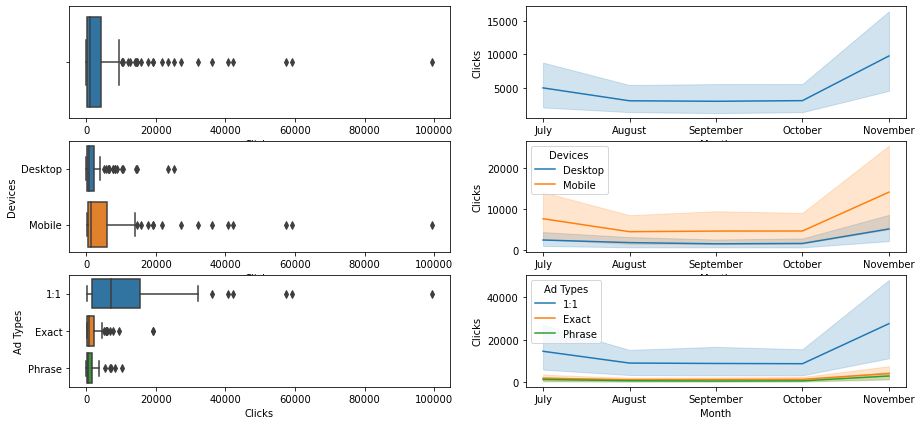

In [36]:
box_and_line_plots(data=market_df, feature="Clicks")

In [40]:
outliers, top_outliers = find_outliers(data=market_df, feature="Clicks")
top_outliers

Outliers Couns:  24


,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Ad Types,Devices,Campaigns
151,November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.10,-5605.297,1:1,Mobile,[shop coupon]
6,July,152394,59177,0.39,2666,0.04,19371,0.33,13699,294536.92,-5672.271,1:1,Mobile,[shop coupon]
159,November,138811,57405,0.41,7563,0.10,43542,0.76,42440,886095.31,-1101.899,1:1,Mobile,[shop promo code]
175,November,99258,42283,0.43,4349,0.08,24149,0.57,24071,500400.85,-77.730,1:1,Mobile,[shop coupon code]
76,September,90806,40622,0.45,1421,0.03,10904,0.27,7891,170418.87,-3012.910,1:1,Mobile,[shop coupon]


In [41]:
market_df.describe()["Impressions"]

count       190.000000
mean      14077.363158
std       29771.686227
min          35.000000
25%        1065.000000
50%        4969.000000
75%       13380.000000
max      276568.000000
Name: Impressions, dtype: float64

##### CTR

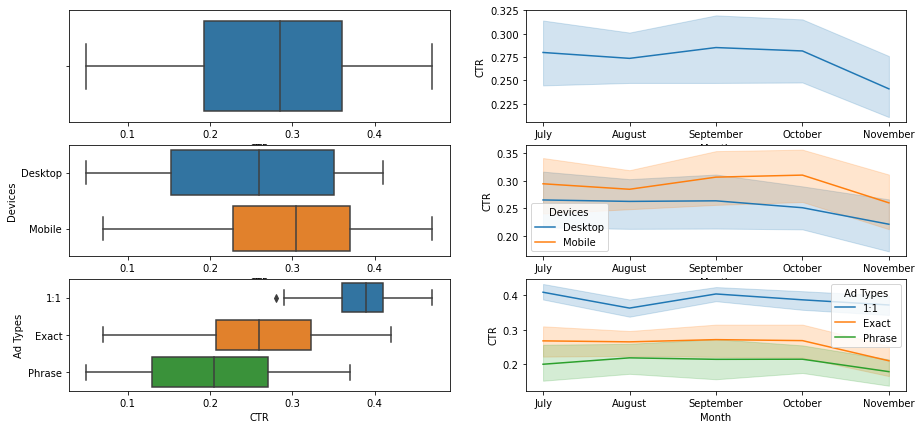

In [42]:
box_and_line_plots(data=market_df, feature="CTR")

In [43]:
outliers, top_outliers = find_outliers(data=market_df, feature="CTR")
top_outliers

Outliers Couns:  0


,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Ad Types,Devices,Campaigns


##### Cost 

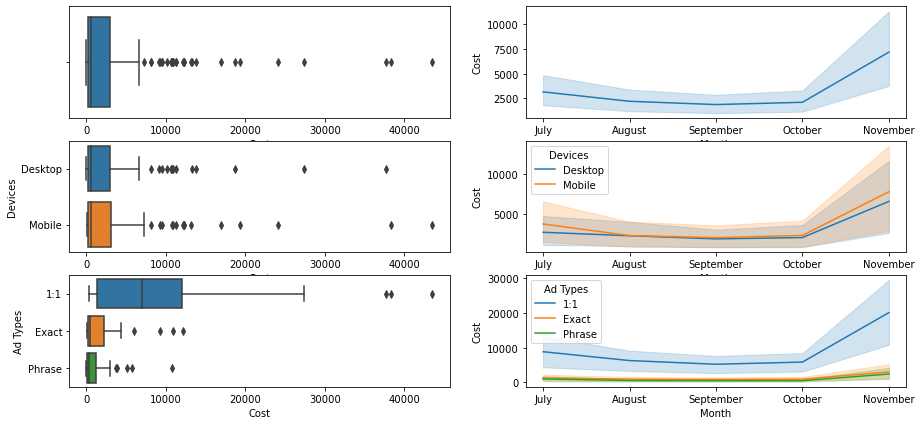

In [45]:
box_and_line_plots(data=market_df, feature="Cost")

In [47]:
outliers, top_outliers = find_outliers(market_df, "Cost")
top_outliers

Outliers Couns:  29


,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Ad Types,Devices,Campaigns
159,November,138811,57405,0.41,7563,0.10,43542,0.76,42440,886095.31,-1101.899,1:1,Mobile,[shop promo code]
151,November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.10,-5605.297,1:1,Mobile,[shop coupon]
153,November,64067,23538,0.37,5782,0.15,37729,1.60,34518,725773.92,-3211.121,1:1,Desktop,[shop promo code]
152,November,73448,25283,0.34,4080,0.10,27336,1.08,23857,497790.81,-3478.644,1:1,Desktop,[shop coupon]
175,November,99258,42283,0.43,4349,0.08,24149,0.57,24071,500400.85,-77.730,1:1,Mobile,[shop coupon code]


##### CPC (Cost Per Click)

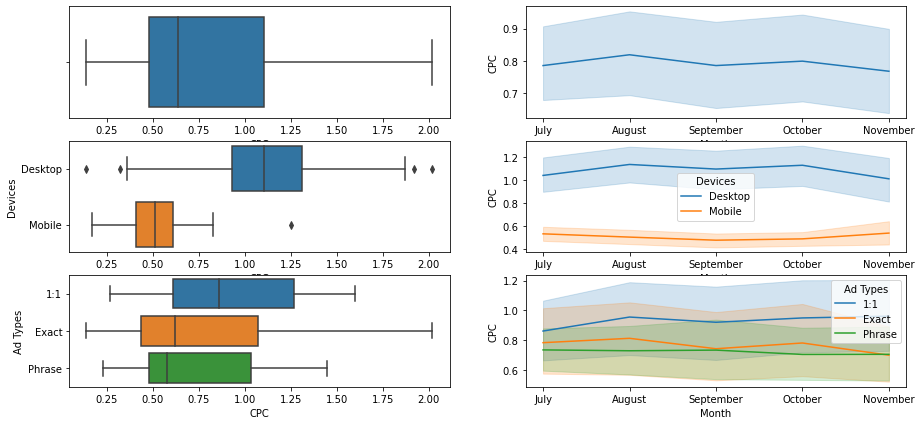

In [48]:
feature = "CPC"
box_and_line_plots(market_df, feature=feature)

In [49]:
outliers, top_outliers = find_outliers(market_df, feature)
top_outliers

Outliers Couns:  0


,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Ad Types,Devices,Campaigns


In [50]:
market_df.head()

,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Ad Types,Devices,Campaigns
0,July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086,1:1,Desktop,[shop coupon code]
1,July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951,1:1,Desktop,[shop coupon]
2,July,3635,1458,0.40,248,0.09,1606,1.10,1723,39165.46,117.136,1:1,Desktop,[shop discount code]
3,July,26185,10418,0.40,2294,0.12,13278,1.27,13042,284823.48,-235.921,1:1,Desktop,[shop promo code]
4,July,808,282,0.35,61,0.15,391,1.39,337,7717.77,-53.604,1:1,Desktop,[shop promo]


##### Revenue 

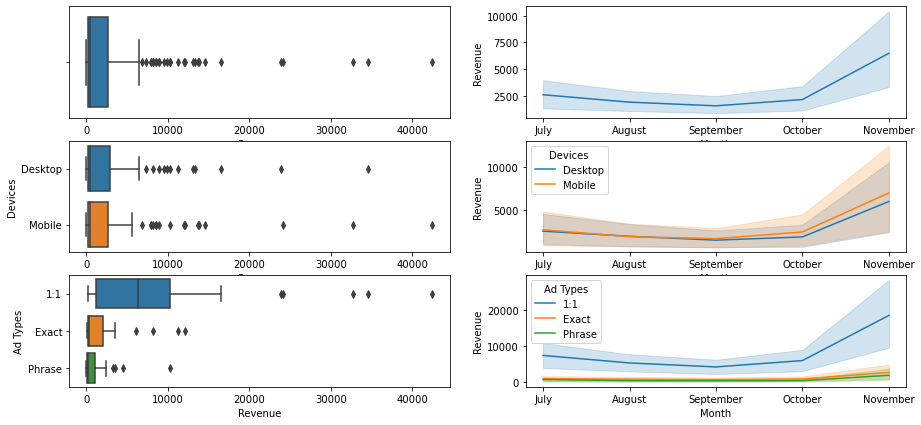

In [51]:
feature = "Revenue"
box_and_line_plots(market_df, feature)

In [53]:
outliers, top_outliers = find_outliers(market_df, feature)
top_outliers

Outliers Couns:  28


,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Ad Types,Devices,Campaigns
159,November,138811,57405,0.41,7563,0.10,43542,0.76,42440,886095.31,-1101.899,1:1,Mobile,[shop promo code]
153,November,64067,23538,0.37,5782,0.15,37729,1.60,34518,725773.92,-3211.121,1:1,Desktop,[shop promo code]
151,November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.10,-5605.297,1:1,Mobile,[shop coupon]
175,November,99258,42283,0.43,4349,0.08,24149,0.57,24071,500400.85,-77.730,1:1,Mobile,[shop coupon code]
152,November,73448,25283,0.34,4080,0.10,27336,1.08,23857,497790.81,-3478.644,1:1,Desktop,[shop coupon]


##### Sale Amount 

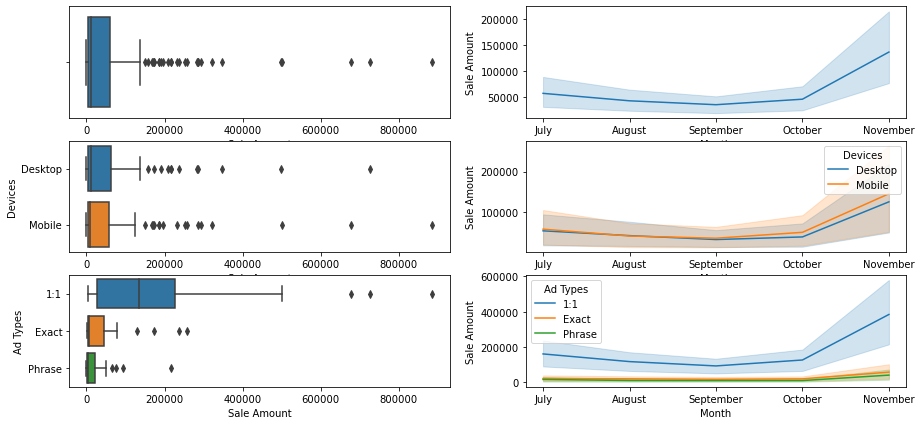

In [54]:
feature = "Sale Amount"
box_and_line_plots(market_df, feature)

In [56]:
outliers, top_outliers = find_outliers(market_df, feature)
top_outliers

Outliers Couns:  28


,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Ad Types,Devices,Campaigns
159,November,138811,57405,0.41,7563,0.10,43542,0.76,42440,886095.31,-1101.899,1:1,Mobile,[shop promo code]
153,November,64067,23538,0.37,5782,0.15,37729,1.60,34518,725773.92,-3211.121,1:1,Desktop,[shop promo code]
151,November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.10,-5605.297,1:1,Mobile,[shop coupon]
175,November,99258,42283,0.43,4349,0.08,24149,0.57,24071,500400.85,-77.730,1:1,Mobile,[shop coupon code]
152,November,73448,25283,0.34,4080,0.10,27336,1.08,23857,497790.81,-3478.644,1:1,Desktop,[shop coupon]


##### P&L 

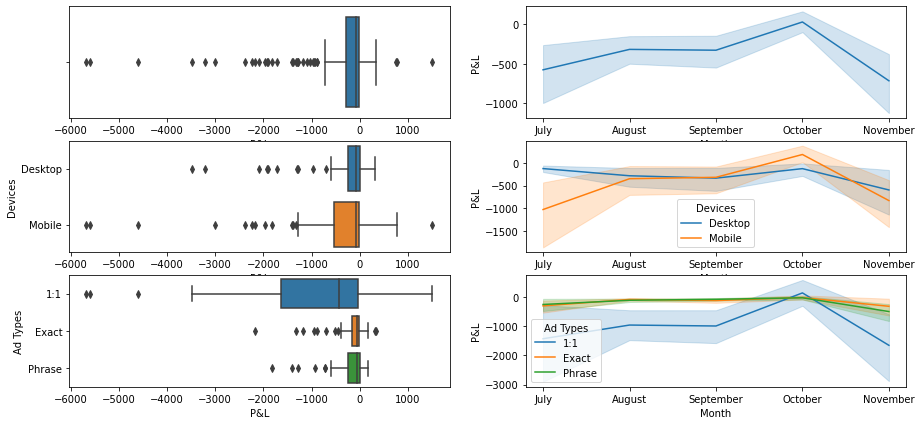

In [57]:
feature = "P&L"
box_and_line_plots(market_df, feature)

In [58]:
outliers, top_outliers = find_outliers(market_df, feature)
top_outliers

Outliers Couns:  32


,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Ad Types,Devices,Campaigns
114,October,93406,36068,0.39,2444,0.05,12236,0.34,13744,285638.30,1507.685,1:1,Mobile,[shop coupon]
115,October,34929,15595,0.45,2193,0.09,11258,0.72,12025,252296.27,766.859,1:1,Mobile,[shop promo code]
118,October,28102,12485,0.44,1393,0.07,7192,0.58,7955,166656.05,762.921,1:1,Mobile,[shop coupon code]
162,November,18275,8012,0.44,808,0.07,5651,0.71,4773,99420.38,-877.986,1:1,Mobile,[shop discount code]
161,November,20699,5540,0.27,320,0.05,2893,0.52,2003,44985.83,-890.164,Exact,Mobile,Discount Code


In [61]:
outliers.sort_values(feature)[:5]

,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Ad Types,Devices,Campaigns
6,July,152394,59177,0.39,2666,0.04,19371,0.33,13699,294536.92,-5672.271,1:1,Mobile,[shop coupon]
151,November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.10,-5605.297,1:1,Mobile,[shop coupon]
5,July,46507,21756,0.47,1665,0.05,13157,0.60,8550,185824.49,-4606.713,1:1,Mobile,[shop coupon code]
152,November,73448,25283,0.34,4080,0.10,27336,1.08,23857,497790.81,-3478.644,1:1,Desktop,[shop coupon]
153,November,64067,23538,0.37,5782,0.15,37729,1.60,34518,725773.92,-3211.121,1:1,Desktop,[shop promo code]
